#💡**Telecom X - Análisis de Evasión de Clientes**
Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

##📖 **Librerias utlizadas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##📌 **Extracción**

In [2]:
#Traemos los datos de la API
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)
datos

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [3]:
#Dado que hay varios datos con mas dicionarios tenemos que normalizarlo
datos_norm = pd.concat([datos['customerID'],datos['Churn'],pd.json_normalize(datos['customer']),pd.json_normalize(datos['phone']),pd.json_normalize(datos['internet']),pd.json_normalize(datos['account'])],axis=1)
datos_norm.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
#Mostramos una muestra de 10 datos para ver la consistencia y lo que posteriormene se va a tratar al igual para familiarzarnos con los datos
datos_norm.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
6385,8774-QWEBD,,Male,0,Yes,Yes,40,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),20.40,745.3
2429,3394-UQYIB,,Female,1,Yes,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),50.15,115.1
5521,7567-ECMCM,No,Male,0,No,No,24,Yes,No,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),79.85,2001
3776,5180-UCIIQ,Yes,Male,1,Yes,Yes,22,No,No phone service,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,40.05,880.2
1919,2717-HVIZY,No,Female,0,No,Yes,8,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,163.6
1387,2003-CKLOR,Yes,Male,0,No,No,66,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,99.50,6710.5
593,0843-WTBXE,Yes,Male,0,No,No,53,Yes,Yes,Fiber optic,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),85.45,4517.25
177,0277-ORXQS,No,Male,0,Yes,Yes,66,No,No phone service,DSL,...,No,No,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),50.55,3364.55
2882,3999-QGRJH,Yes,Male,1,No,No,8,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,560.85
3467,4804-NCPET,No,Male,0,Yes,Yes,19,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.20,387.4


In [5]:
#Analizamos los tipos de las columnas
datos_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [6]:
#nos ayudara a no presentar errores en  futuras consultas
datos_norm = datos_norm.rename(columns={'Charges.Monthly': 'Charges_Monthly','Charges.Total':'Charges_Total'})

In [7]:
datos_norm.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


##🔧 Transformación

###**Comprobación de incoherencias en los datos**

In [8]:
datos_norm.sample(10)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
4278,5884-FBCTL,No,Female,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.10,1857.85
2173,3043-TYBNO,No,Male,0,No,No,3,Yes,No,DSL,...,No,No,Yes,No,Yes,Month-to-month,No,Mailed check,60.65,196.9
4007,5480-XTFFL,No,Female,0,Yes,Yes,31,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,21.00,697.7
6894,9503-XJUME,No,Male,0,No,Yes,52,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.65,928.4
2609,3640-PHQXK,Yes,Female,0,No,No,31,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,89.90,2806.9
429,0617-FHSGK,Yes,Male,0,No,Yes,49,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.20,3678.3
6767,9337-SRRNI,No,Male,0,No,Yes,66,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.30,1673.8
3706,5117-ZSMHQ,No,Female,0,Yes,Yes,71,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),89.90,6342.7
5639,7698-YFGEZ,No,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.00,20
7181,9873-MNDKV,No,Female,0,No,No,11,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,44.65,472.25


In [9]:
#Verificamos valores nullos
datos_norm.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


***Con esto nos demos dado cuenta que en todas las columnas no hay valores nullos por el momento***

In [10]:
#Aplicamos una funcion la cual nos regresara los valores unicos de los datos que en algunos casos con el diccionario nos ayudara a vreficar las consistencias en los datos
#nota el ";" ayuda que solo imprima nuestro resulado y no el de el apply
datos_norm.apply(lambda x: print(f'{x.name}\n{x.unique()}'));

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn
['No' 'Yes' '']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['Yes' 'No']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService
['Yes' 'No']
MultipleLines
['No' 'Yes' 'No phone service']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['Yes' 'No' 'No internet service']
StreamingTV
['Yes' 'No' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['One year' 'Month-to-month' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automati

In [11]:
datos_norm.shape

(7267, 21)

###***Manejo de inconsistencias***

***Dado que en el analisis rápido nos hemos dado cuenta que en la mayoria de datos existe una coherencia en el formato, solo en la columna "Churn" nos hemos dado cuenta que existe un valor '(espacio vacio)' que esto no nos demuestra una estadistica en concreto, por lo cual nos enfocaremos en esta y otras inconsitencias que puedan ir surgiendo para el tratado de los datos***

In [12]:
#Verificamos cuantos valores vacios existen en la columna CHURN
datos_norm.query('Churn == ""')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [13]:
indices_eliminar = datos_norm.query('Churn == ""').index

  ***Dado que la columna donde se encuentra este tipo de valores vacios es una columna donde es importante que los datos sean más precisios he llegado a la conclusión que es mejor elimnar dichos registros y no tratar de imputarlos de forma arbitraria, ya que solo nos respresenta un 3.08% de nuestros datos totales. Aún así estos datos se guardaran por si en un momento son necesarios***

In [14]:
datos_norm_eliminados = datos_norm.loc[indices_eliminar]
datos_norm = datos_norm.drop(indices_eliminar)

In [15]:
datos_norm.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [17]:
#Trataremos de pasar la columna "charges_total" al tipo valor float
datos_norm['Charges_Total'].astype(np.float64)

ValueError: could not convert string to float: ' '

***Esto nos indica que hay valores que contiene un espacio en blanco***

***Empezaremos a tratar dicha columna para pasarla al tipo de dato correcto***

In [18]:
datos_norm.query('Charges_Total == " "')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


***Còmo podemos obsrvar los datos que tienen la columna total en blanco, todos es por la razon de que no tienen meses de contrato, por lo cual he llegado a la conclusiòn de llenar este total con valor 0***

In [19]:
datos_norm['Charges_Total'] = datos_norm['Charges_Total'].apply(lambda x: 0.0 if x == " " else x)

In [20]:
#Verificamos que haya servido la funciòn para posteriormente aplicar el cambio de tipo de dato
datos_norm.query('Charges_Total == " "')

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total


In [21]:
datos_norm['Charges_Total']=datos_norm['Charges_Total'].astype(np.float64)

In [22]:
datos_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

In [23]:
#tratamos tambien los nombres de las columnas aplicando sintaxis regex
datos_norm.columns = datos_norm.columns.str.replace(r'(?<=[a-z0-9])([A-Z])', r'_\1', regex=True).str.lower()

In [24]:
datos_norm.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'charges_monthly',
       'charges_total'],
      dtype='object')

In [25]:
#Realizamos un ciclo para cambiar todo a minuscula exceptuando columnas numericas o que contenga el id del cliente
for i in datos_norm.select_dtypes(include='object').columns:
  if i != "customer_id":
    datos_norm[i] = datos_norm[i].str.lower()


In [26]:
datos_norm

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.60,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,no,yes,no,no,one year,no,mailed check,55.15,742.90
7263,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70
7264,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,yes,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75
7265,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,no,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65


###***Columna de cuentas diarias***

In [27]:
datos_norm['charges_daily'] = datos_norm['charges_monthly']/30

In [28]:
datos_norm

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.186667
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.463333
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.261667


In [29]:
datos_norm['charges_daily']= datos_norm['charges_daily'].astype(np.float64)

In [30]:

datos_norm['charges_daily']=datos_norm['charges_daily'].round(2)

In [31]:
datos_norm

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.30,2.19
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.40,2.00
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,2.46
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.90,1.84
7263,9992-RRAMN,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,1.68
7265,9993-LHIEB,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,2.26


###***Estandarización y transformación de datos***

In [32]:
datos_norm.apply(lambda x: print(f'{x.name}\n{x.unique()}'));

customer_id
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
churn
['no' 'yes']
gender
['female' 'male']
senior_citizen
[0 1]
partner
['yes' 'no']
dependents
['yes' 'no']
tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_service
['yes' 'no']
multiple_lines
['no' 'yes' 'no phone service']
internet_service
['dsl' 'fiber optic' 'no']
online_security
['no' 'yes' 'no internet service']
online_backup
['yes' 'no' 'no internet service']
device_protection
['no' 'yes' 'no internet service']
tech_support
['yes' 'no' 'no internet service']
streaming_tv
['yes' 'no' 'no internet service']
streaming_movies
['no' 'yes' 'no internet service']
contract
['one year' 'month-to-month' 'two year']
paperless_billing
['yes' 'no']
payment_method
['mailed check' 'electronic check' 'credit card

**Identificamos que son 5 columnas que cumplen con las caracteristicas para pasarlos a valores binarios (1 y 0), por lo cual procedermos a realizarlo**

In [33]:
columnas = ['churn', 'partner', 'dependents', 'phone_service', 'paperless_billing']

for i in columnas:
  datos_norm[i] = datos_norm[i].map({'yes': 1, 'no':0})

In [34]:
datos_norm

,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,charges_monthly,charges_total,charges_daily
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,no,yes,yes,no,one year,1,mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,no,yes,month-to-month,0,mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,yes,no,no,no,month-to-month,1,electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,yes,no,yes,yes,month-to-month,1,electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,no,yes,yes,no,month-to-month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,female,0,0,0,13,1,no,dsl,...,no,yes,no,no,one year,0,mailed check,55.15,742.90,1.84
7263,9992-RRAMN,1,male,0,1,0,22,1,yes,fiber optic,...,no,no,no,yes,month-to-month,1,electronic check,85.10,1873.70,2.84
7264,9992-UJOEL,0,male,0,0,0,2,1,no,dsl,...,no,no,no,no,month-to-month,1,mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,male,0,1,1,67,1,no,dsl,...,yes,yes,no,yes,two year,0,mailed check,67.85,4627.65,2.26


##📊 Carga y análisis

###**Análisis Descriptivo**
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_title.html

In [35]:
datos_norm.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,charges_monthly,charges_total,charges_daily
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


###**Distribución de evasión**

In [146]:
churn_data = datos_norm['churn'].value_counts()



array([5174, 1869])

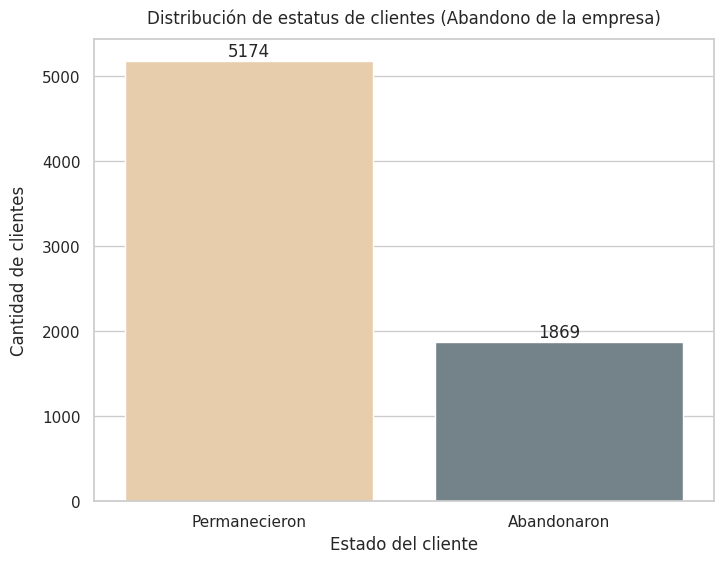

In [37]:

sns.set_theme(style='whitegrid')
#Configurando el grafico
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x=churn_data.index,y=churn_data.values,hue=churn_data.index,palette=['#F2CEA2','#70848C'],legend=False)
ax.set_title('Distribución de estatus de clientes (Abandono de la empresa)',pad=11)
ax.set_xticks([0, 1],['Permanecieron', 'Abandonaron'])
ax.set_ylabel('Cantidad de clientes',labelpad=10.0)
ax.set_xlabel('Estado del cliente')

for i, j in enumerate(churn_data.values):
    ax.text(i, j + 60, str(j), ha='center', fontsize=12)
plt.show()

###***Recuento de evasión por variables categóricas***

#####**Género**

In [104]:
datos_norm

genero_data = pd.DataFrame({'female':datos_norm[datos_norm['gender'] == 'female']['churn'].value_counts(),'male':datos_norm[datos_norm['gender'] == 'male']['churn'].value_counts()})
genero_data


,female,male
churn,,
0,2549,2625
1,939,930


In [155]:
genero_data['female'][0]

<function list.index(value, start=0, stop=9223372036854775807, /)>

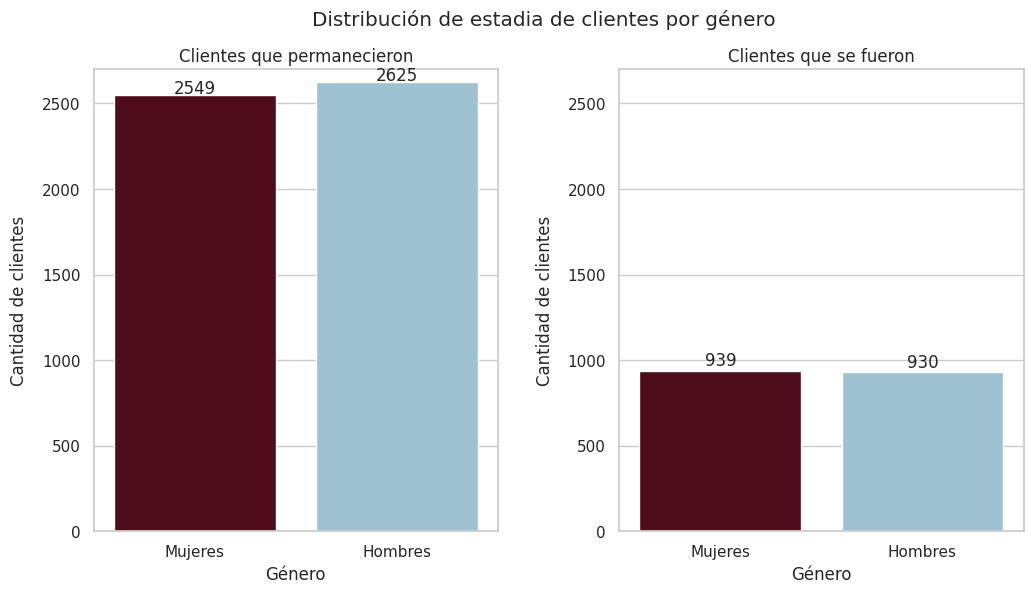

In [161]:

sns.set_theme(style='whitegrid')
#Configurando el grafico
fig,ax = plt.subplots(1,2,figsize=(12,6))
#separando graficos
fig.subplots_adjust(hspace=0.5,wspace=0.3)

fig.suptitle('Distribución de estadia de clientes por género')
# Gráfico para los clientes que permanecieron
sns.barplot(
    x=genero_data.index,
    y=[genero_data['female'][0],genero_data['male'][0]],
    palette=['#590212', '#96C6D9'],
    hue=['Mujeres','Hombres'],
    legend=False,
    ax=ax[0]
)
ax[0].set_title('Clientes que permanecieron')
ax[0].set_xticks([0, 1],['Mujeres', 'Hombres'])
ax[0].set_xlabel('Género')
ax[0].set_ylabel('Cantidad de clientes',labelpad=10.0)
for i, j in enumerate([genero_data['female'][0],genero_data['male'][0]]):
    ax[0].text(i, j + 10, str(j), ha='center', fontsize=12)
# Gráfico para los clientes que se fueron
sns.barplot(
    x=genero_data.index,
    y=[genero_data['female'][1],genero_data['male'][1]],
    palette=['#590212', '#96C6D9'],
    hue=['Mujeres','Hombres'],
    legend=False,
    ax=ax[1]
)
ax[1].set_title('Clientes que se fueron')
ax[1].set_xticks([0, 1],['Mujeres', 'Hombres'])
ax[1].set_xlabel('Género')
ax[1].set_ylabel('Cantidad de clientes',labelpad=10.0)
for i, j in enumerate([genero_data['female'][1],genero_data['male'][1]]):
    ax[1].text(i, j + 30, str(j), ha='center', fontsize=12)

ymin = 0
ymax = 2700

for ax in ax.ravel():
  ax.set_ylim(ymin,ymax)
plt.show()

##📄Informe final